In [17]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt
import os

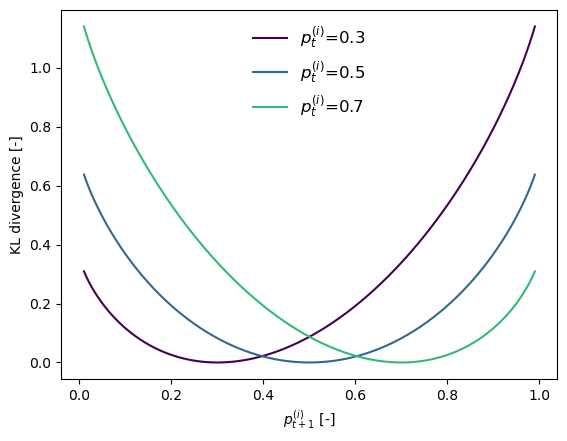

<Figure size 640x480 with 0 Axes>

In [20]:
p2 = torch.tensor([0.3, 0.5, 0.7])
p1 = torch.linspace(0.01, 0.99, 1000)

# KL divergence
kl = lambda x: torch.log(1-p1) - torch.log(1-x) + p1 * torch.log(p1*(1-x)/(x*(1-p1)))
cm = plt.get_cmap('viridis', len(p2)+1)
# plot 
for i, p in enumerate(p2):
    plt.plot(p1, kl(p).detach().numpy(), label=r'$p_{t}^{(i)}$'+ f'={p:.1f}', color=cm(i))
plt.xlabel('$p_{t+1}^{(i)}$ [-]')
plt.ylabel('KL divergence [-]')
plt.legend(frameon=False, fontsize=12)
plt.show()
# save as pdf and svg
os.makedirs('paper', exist_ok=True)
plt.savefig('paper/kl_divergence.pdf', bbox_inches='tight')
plt.savefig('paper/kl_divergence.svg')

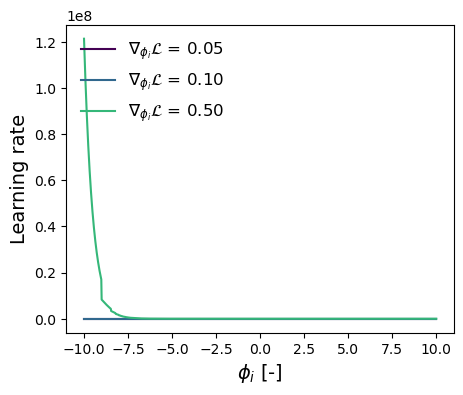

In [8]:
 # plot 1/cosh²(x)
x = torch.linspace(-10, 10, 1_000)
loss = torch.tensor([0.05, 0.10, 0.5])
# color map viridis
cm = plt.get_cmap('viridis', len(loss)+1)
plt.figure(figsize=(5, 4))
for index, a in enumerate(loss):
    f = 1/(1+ 2*torch.tanh(x)*a + 1/torch.cosh(x)**2)
    plt.plot(x, f, label=r'$\nabla_{\phi_i}\mathcal{L}$'+ f' = {a:.2f}', color=cm(index))
plt.ylabel(r'Learning rate', fontsize=14)
plt.legend(fontsize=12, frameon=False, loc='upper left')
plt.xlabel('$\phi_i$ [-]', fontsize=14)
plt.show()

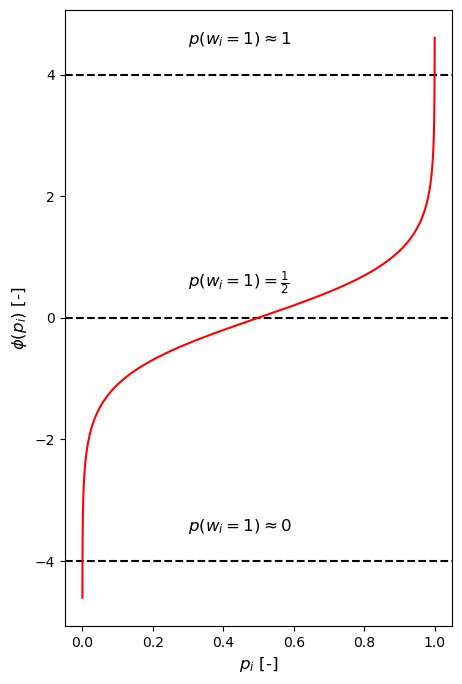

In [9]:
p = torch.arange(0, 1, 0.0001)
fct = 1/2 *torch.log(p/(1-p))
# add grid
fig, ax = plt.subplots(figsize=(5, 8))
# dashed line at y=0
ax.axhline(y=0, color='black', linestyle='--')
ax.axhline(y=4, color='black', linestyle='--')
ax.axhline(y=-4, color='black', linestyle='--')
# write a text above each dashed line corresponding to p=0, p=1/2, p=1
ax.text(0.3, 0.5, r'$p(w_i = 1) = \frac{1}{2}$', fontsize=12)
ax.text(0.3, 4.5, r'$p(w_i = 1) \approx 1$', fontsize=12)
ax.text(0.3, -3.5, r'$p(w_i = 1) \approx 0$', fontsize=12)

ax.set_xlabel(r'$p_i$ [-]', fontsize=12)
ax.set_ylabel(r'$\phi(p_i)$ [-]', fontsize=12)
ax.plot(p, fct, color='red')
 